# Fit KDE on random conformers

Notebook for fitting KDE on totally random conformers from successfully crystallised fragments.

Lets load the best docked poses

In [1]:
import pandas as pd

df_best_poses = pd.read_csv('mpro_frags_best_poses.csv')
df_best_poses

,RealCrystalName,smiles,score,ligand_index
0,Mpro-x0540,O=C(NCCC=1C=CN=CC1)NC2CCCCC2,58.0547,0
1,Mpro-x0426,FC=1C=CC=CC1C(=O)NCCC=2C=CN=CC2,57.3072,0
2,Mpro-x1093,CN1CCN(CC1)C(=O)CC1=CNC2=NC=CC=C12,52.5756,0
3,Mpro-x0967,CC(=O)NC(Cc1ccc(cc1)O)C(=O)NCC#CBr,51.2811,0
4,Mpro-x0104,CC(=O)NCCC1=CNC=2C=CC(F)=CC12,50.3251,1
5,Mpro-x0354,CN1CCN(CC1)C(=O)COC=2C=CC(C)=CC2,48.1828,1
6,Mpro-x0072,CS(=O)(=O)NCCC=1C=CC=CC1,47.1679,1
7,Mpro-x1249,O=C(NCC=1C=CC(C#N)=CC1)N2CCOCC2,47.0372,0
8,Mpro-x2193,CS(=O)(=O)c1ccc(cc1)N1CCNCC1,45.9846,0
9,Mpro-x1077,N#CC=1C=CC(=CN1)N2CCCOCC2,44.3030,0


Generate rdkit mol object by template matching onto conformer

In [2]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.rdmolfiles import MolFromMol2File

n_poses = 1

mol_list = []
for index, row in df_best_poses.iterrows():
    
    for pose in range(1, n_poses+1):
        
        mol_from_smiles = Chem.MolFromSmiles(row['smiles'])
        mol = Chem.AddHs(mol_from_smiles)
        AllChem.EmbedMolecule(mol)
        
        mol_list.append(mol)

INFO:rdkit:Enabling RDKit 2022.03.2 jupyter extensions


Generate pharmacophore dataframe

In [3]:
import numpy as np
from fresco.featurise import return_pcore_dataframe_for_list_of_mols

fragpcore_df = return_pcore_dataframe_for_list_of_mols(mol_list)
fragpcore_df

100%|██████████| 20/20 [00:00<00:00, 115.23it/s]


,pcore,smiles,mol_id,coord_x,coord_y,coord_z,weight
0,Donor,[H]c1nc([H])c([H])c(C([H])([H])C([H])([H])N([H...,0,1.004788,-1.455943,-0.649012,1.0
0,Donor,[H]c1nc([H])c([H])c(C([H])([H])C([H])([H])N([H...,0,-1.471281,-1.238775,-0.358663,1.0
0,Acceptor,[H]c1nc([H])c([H])c(C([H])([H])C([H])([H])N([H...,0,-0.041681,0.528405,-0.204040,1.0
0,Acceptor,[H]c1nc([H])c([H])c(C([H])([H])C([H])([H])N([H...,0,6.660702,1.234422,0.047150,1.0
0,Aromatic,[H]c1nc([H])c([H])c(C([H])([H])C([H])([H])N([H...,0,5.405110,0.762825,0.226496,1.0
...,...,...,...,...,...,...,...
0,Acceptor,[H]c1nc([H])c(N([H])[H])c([H])n1,18,1.490155,1.117836,0.095291,1.0
0,Acceptor,[H]c1nc([H])c(N([H])[H])c([H])n1,18,1.449214,-1.178684,0.005630,1.0
0,Aromatic,[H]c1nc([H])c(N([H])[H])c([H])n1,18,0.788298,-0.014820,0.026276,1.0
0,Donor,[H]N=C(N([H])[H])C([H])([H])C([H])([H])[H],19,0.598125,1.213806,-1.055895,1.0


In [4]:
from fresco.featurise import return_default_pharmacophore_pairs, calculate_pairwise_distances_between_pharmacophores_for_fragment_ensemble

pcore_pairs = return_default_pharmacophore_pairs()

frag_pair_distance_dict = {}   

for pcore_pair in pcore_pairs:
    core_a,core_b = pcore_pair.split('-')
    frag_pair_distance_dict[pcore_pair] = calculate_pairwise_distances_between_pharmacophores_for_fragment_ensemble(fragpcore_df, core_a, core_b)

frag_pair_distance_dict

0     True
0     True
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
Name: smiles, dtype: bool
0    False
0    False
0     True
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
Name: smiles, dtype: bool
0    False
0    False
0    False
0     True
0     True
0     True
0     True
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0    False
0 

{'Donor-Aromatic': array([ 3.54509262,  4.16236881,  4.6816377 ,  5.72977358,  4.77606866,
         3.83274332,  4.17672123,  3.30577755,  3.85574569,  4.74250148,
         1.29565463,  2.53912364,  2.15155397,  1.03833194,  1.46233488,
         4.70864541,  2.85807156,  2.0276861 ,  2.39053272,  2.60235731,
         1.6061497 ,  5.29689669,  2.01105421,  2.24923891,  3.40637195,
         3.36640203,  2.36466899,  1.76844515,  5.56611377,  1.41707099,
         2.38704185,  2.78399819,  4.11537738,  4.1744205 ,  2.29366523,
         3.76947657,  2.40074034,  1.31042742,  1.51203721,  4.24284379,
         1.3687812 ,  2.59844989,  5.53776814,  3.75671598,  5.09172363,
         3.86945725,  3.4998654 ,  3.35261818,  3.88062296,  3.2284134 ,
         3.90837795,  1.59869577,  3.03871775,  3.09022706,  1.11490629,
         2.92006412,  3.89806177,  1.96426803,  1.35652367,  2.86455292,
         2.03808439,  1.53222824,  1.50629078,  1.33336183,  7.11308655,
         6.42907366,  6.02176036,

In [5]:

from fresco.model import fit_pair_kde

pair_kdes = {}

for pcore_pair in tqdm(pcore_pairs):
    core_a,core_b = pcore_pair.split('-')

    pair_data = frag_pair_distance_dict[pcore_pair]
    kde = fit_pair_kde(pair_data)
    pair_kdes[pcore_pair] = kde
    
pair_kdes

100%|██████████| 6/6 [00:00<00:00, 65.67it/s]


{'Donor-Aromatic': <scipy.interpolate.interpolate.interp1d at 0x7febb9c2e4d0>,
 'Aromatic-Acceptor': <scipy.interpolate.interpolate.interp1d at 0x7febb9c22a10>,
 'Aromatic-Aromatic': <scipy.interpolate.interpolate.interp1d at 0x7febb9c22170>,
 'Donor-Donor': <scipy.interpolate.interpolate.interp1d at 0x7febb9c223b0>,
 'Donor-Acceptor': <scipy.interpolate.interpolate.interp1d at 0x7febb9c22cb0>,
 'Acceptor-Acceptor': <scipy.interpolate.interpolate.interp1d at 0x7febb9c22410>}

/Users/williammccorkindale/miniconda3/envs/csd_env/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/williammccorkindale/miniconda3/envs/csd_env/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/williammccorkindale/miniconda3/envs/csd_env/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/williammccorkindale/miniconda3/envs/csd_env/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/williammc

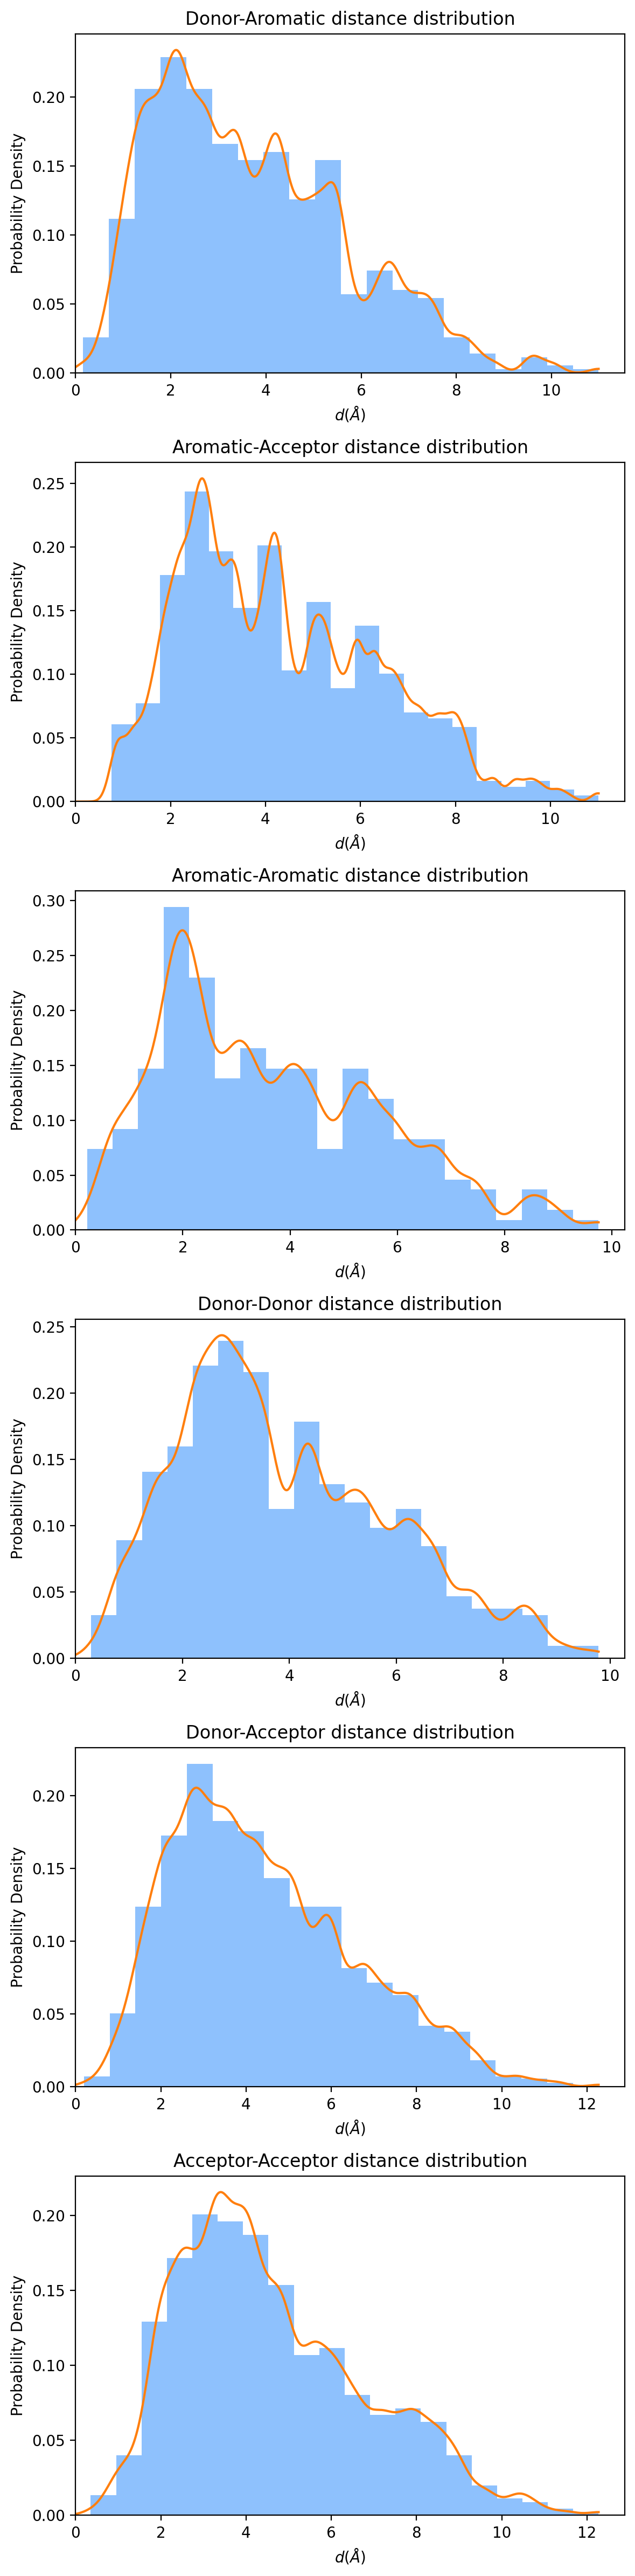

In [6]:
# import seaborn as sns
import matplotlib.pyplot as plt

nx = 500

n_bins = 20

cmap = plt.get_cmap("tab10")
# sns.set_style('white')

fig, axs = plt.subplots(nrows=6, figsize=(6, 24), dpi=200)
for i,combo in enumerate(pcore_pairs):
    x = np.linspace(0, np.amax(frag_pair_distance_dict[combo]), nx)
    kde_pair = pair_kdes[combo]
    axs[i].set_title('{} distance distribution'.format(
    combo))
    axs[i].hist(frag_pair_distance_dict[combo], bins=n_bins,
                alpha=0.5, density=True, color='#1E85FC')
    axs[i].plot(x, np.exp(kde_pair(x)), color=cmap(1))
    axs[i].set_xlim(left=0)
    axs[i].set_ylabel('Probability Density')
    axs[i].set_xlabel(r'$d (\AA)$')
    fig.tight_layout()
    fig.show()


In [7]:
from fresco.model import save_kde_model

# save_kde_model(filename='kde_on_docked_mpro_frags.pkl', kde_model=pair_kdes)
# save_kde_model(filename=f'kde_on_{n_poses}_docked_mpro_frags.pkl', kde_model=pair_kdes)
save_kde_model(filename=f'kde_on_random_mpro_frags.pkl', kde_model=pair_kdes)

